<a href="https://colab.research.google.com/github/abinayaprince/Analyzing-Historical-Stock-Revenue-Data-and-Building-a-Dashboard/blob/main/Tesla_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Question 1: Use yfinance to Extract Stock Data
Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.


In [1]:

import yfinance as yf

# Create ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Extract stock information and save in a dataframe
tesla_data = tesla.history(period="max")

# Reset index
tesla_data.reset_index(inplace=True)

# Display the first five rows
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


 Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.

In [4]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Define URL and variables
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = ""
soup = None
tables = []
revenue_table = None
rows = []
tesla_revenue = []
tesla_revenue_df = pd.DataFrame()

# Fetch and parse HTML
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")

# Find the correct table
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        revenue_table = table
        break

# If the table was found, extract data
if revenue_table:
    rows = revenue_table.find_all("tr")

    for row in rows[1:]:  # skip the header row
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            if revenue:
                tesla_revenue.append({"Date": date, "Revenue": revenue})

    # Create DataFrame
    tesla_revenue_df = pd.DataFrame(tesla_revenue)

# Display the last 5 rows
tesla_revenue_df.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
51,2009-09-30,46
52,2009-06-30,27


Question 3: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [5]:
gme_data = yf.download("GME")

# Reset index
gme_data.reset_index(inplace=True)

# Display first five rows
print("GameStop (GME) Stock Data (First 5 Rows):")
display(gme_data.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

GameStop (GME) Stock Data (First 5 Rows):


Price,Date,Close,High,Low,Open,Volume
Ticker,,GME,GME,GME,GME,GME
0,2002-02-13,1.691666,1.693349,1.603295,1.620128,76216000
1,2002-02-14,1.683251,1.716074,1.670626,1.712707,11021600
2,2002-02-15,1.674834,1.687458,1.658002,1.683250,8389600
3,2002-02-19,1.607504,1.666418,1.578047,1.666418,7410400
4,2002-02-20,1.662210,1.662210,1.603296,1.615921,6892800


Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.

In [9]:
# Define variables
gme_revenue = []
gme_revenue_df = pd.DataFrame()

# Fetch and parse HTML
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")

# Find the correct table with "GameStop Quarterly Revenue"
for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        revenue_table = table
        break

# Extract rows and build dataframe
if revenue_table:
    rows = revenue_table.find_all("tr")

    for row in rows[1:]:  # skip header
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            if revenue:
                gme_revenue.append({"Date": date, "Revenue": revenue})

    # Create DataFrame
    gme_revenue_df = pd.DataFrame(gme_revenue)

# Display last 5 rows
gme_revenue_df.tail()

""


Question 5: Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

Upload a screenshot of your results.

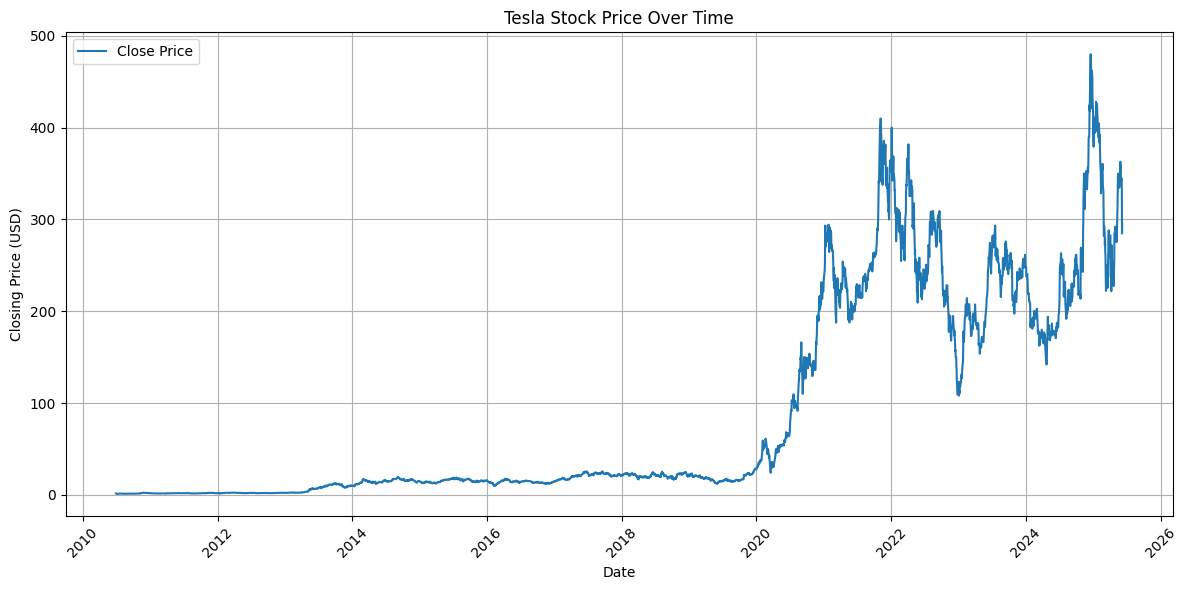

In [10]:
import matplotlib.pyplot as plt

# Define make_graph function
def make_graph(stock_data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function for Tesla stock
make_graph(tesla_data, "Tesla Stock Price Over Time")

Question 6: Plot GameStop Stock Graph

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

Upload a screenshot of your results.

In [11]:
gme_data = yf.download("GME")
gme_data.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [13]:
def make_graph(stock_data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

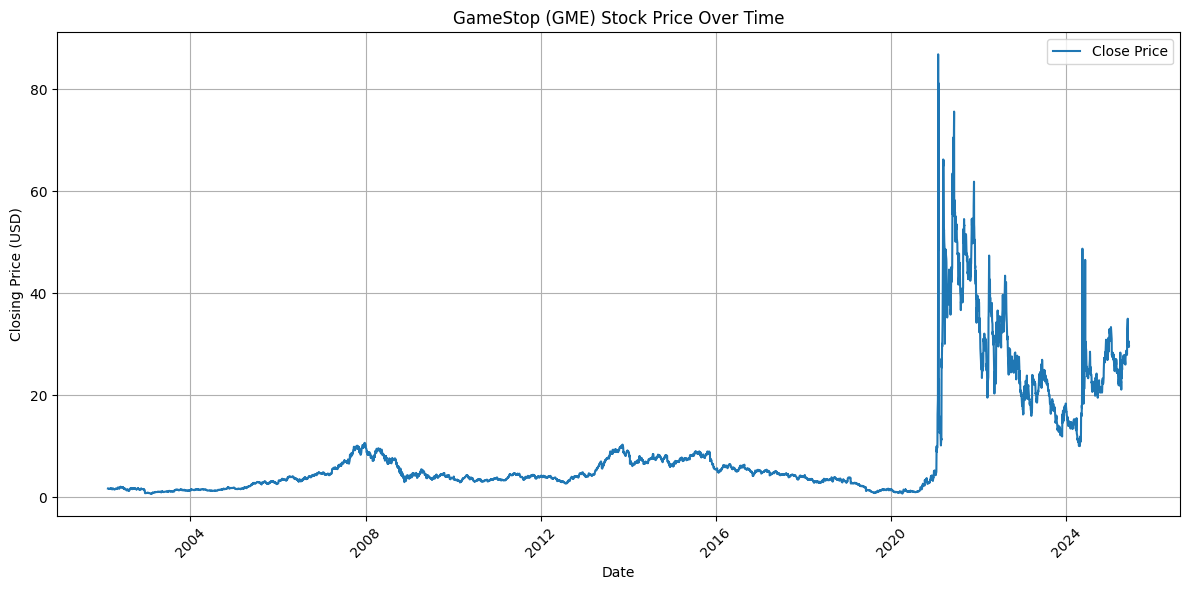

In [14]:
make_graph(gme_data, "GameStop (GME) Stock Price Over Time")